In [9]:
import cv2
from matplotlib import pyplot as plt
from edge_detection import*

In [10]:
img = cv2.imread('1.jpg')
opening = create_Mathematical_Morphology_for_image(img)
mathematical_morphology_sobel_image = create_sobel_filter_for_image(image=opening, x_kernel= 3, y_kernel=3, threshold_value=100)

sobel_image = create_sobel_filter_for_image(image=img, x_kernel= 3, y_kernel=3, threshold_value=100)

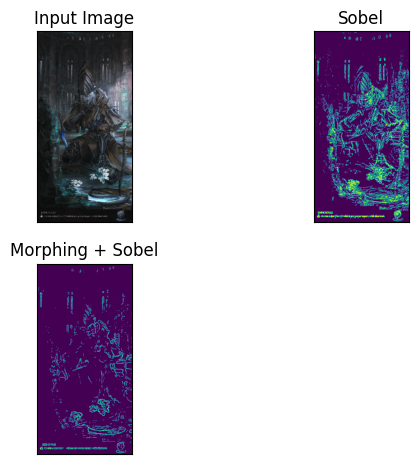

In [11]:
plt.subplot(221),plt.imshow(img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(mathematical_morphology_sobel_image)
plt.title('Morphing + Sobel'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(sobel_image)
plt.title("Sobel"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

In [12]:
frames_list, filtered_frames_list,morph_frames_list = create_frames_from_video("flick.mp4")


In [14]:
show_video_from_frames(frames_list, filtered_frames_list,morph_frames_list)